# Изучение закономерностей, определяющих успешность игр

**Заказчик** — интернет-магазин «Стримчик», продающий компьютерные игры по всему миру.

**Входные данные** - исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Описание данных:

- Name — название игры Platform — платформа 
- Year_of_Release — год выпуска 
- Genre — жанр игры 
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий) 
- JP_sales — продажи в Японии (миллионы проданных копий) 
- Other_sales — продажи в других странах (миллионы проданных копий) 
- Critic_Score — оценка критиков (максимум 100) 
- User_Score — оценка пользователей (максимум 10) 
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


**Цель исследования** - выявить закономерности, определяющие успешность игры, позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**Дополнительная информация:** 

Entertainment Software Rating Board (ESRB)  - ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение общей информации о данных

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib для работы с графиками 
import matplotlib.pyplot as plt
import numpy as np
# импорт stats и numpy для проверки гипотез 
from scipy import stats as st 

In [2]:
# чтение файла с данными и сохранение в переменную data
# data = pd.read_csv('/Users/larinav/Downloads/games.csv')

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# получение первых 10 строк таблицы data
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод:

В таблице представлены данные интернет-магазина «Стримчик», продающий компьютерные игры по всему миру.
В состоит из 11 колонок с общим количеством входных данных - 16715.

Предварительно можно утверждать, что, данных достаточно для выяснения поставленного в исследовании вопроса. На данном этапе выявлены следующие замечания в таблице:

- В названиях колонок  наблюдается нарушение стиля - необходимо привести названия к нижнему регистру
- В 6ти колонках - Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating - выявлены пропуски.
- В колонках Year_of_Release, Critic_Score необходимо преобразование данных к нужным типам

Чтобы двигаться дальше, нужно описать возможные причины появления проблем в данных и обработать их.


## Предобработка данных

### Замена названий столбцов

In [5]:
# приведение названий столбцов к нижнему регистру
data = data.rename(columns = str.lower)

In [6]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков 

In [7]:
# получение общей информации о данных в таблице data
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах critic_score и user_score заполнять не будем - любое заполнение исказит результаты корреляционного анализа и стат-тестов. 

Пропуски в столбце rating заполним значением "undefined" так как, это категориальная переменная.

Пропусков в годах (year_of_release) и названиях игр (name) -  не более 2%, поэтому данные строки можно будет удалить из набора данных.

In [8]:
# удаляем строки, в которых есть пропущенные значения в столбцах 'name','year_of_release'
data = data.dropna(subset = ['name','year_of_release']).reset_index(drop = True)

Посмотрим на взаимосвязь пропусков в столбце rating с другими данными, чтобы понять возможную причину их возникновения и заполним пропущенные значения. 

In [9]:
data[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [10]:
# замена на пустую строку
data.rating = data.rating.fillna("undefined")

Было принято решение не заполнять пропуски в столбцах critic_score и user_score, однако посмотрим на уникальные значения данных столбцов.

In [11]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score с оценками пользователей были выявлены значения - 'tbd' ( to be determined ) - что, по сути означает, что значения не определены. Заменим данные значения на 'nan', для упрощения работы с данными.

In [13]:
# замена значений tbd на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

**Вывод:**

На этапе обработки пропусков были выполнены следующие действия:

- пропусков в колонках **year_of_release** и name было выявлено не более 2%, поэтому было принято решение удалить данные строки из набора данных.  Причина пропусков может быть технической.

- пропуски в столбцах **critic_score и user_score** не были заполены, чтобы не исказить данные для последующего анализа. В колонке user_score значения tbd были заменены на nan.  Возможно, данные игры не были оценены пользователями и критиками или не было проведено соответсвующего опроса для оценки - что и стало причиной возникновения пропусков в данных колонках

- пропуски в столбце **rating** были заполнены значением "undefined", так как переменная является категоральной. В связи с тем, что наблюдается взаимосвязь между пропущенными значениями в столбцах с оценками пользователей и критиков, можно сделать предположение, что рейтинг игры основывается именно на этих значениях. Поэтому там где их нет - также появляются пропуски.

### Преобразование данных в нужные типы

In [14]:
# обзор типов значений в колонках
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [15]:
# замена типа данных на float в столбце 'user_score':
data['user_score'] = data['user_score'].astype('float64')

In [16]:
data.year_of_release = data.year_of_release.astype('int')

**Вывод:**

Нарушения стиля наблюдались в 2х колонках:
- 'user_score'(оценка пользователей), где была произведена замена типа данных object на float
- 'year_of_release'( год релиза), где была проиведена замена типа данных с float на  integer

In [17]:
# проверка на наличие дубликатов
data.duplicated().sum()

0

In [18]:
# проверка на наличие дубликатов по ключевым столбцам
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

## Исследовательский анализ данных

### Суммарные продажи

Добавим столбец **'total_sales'** с суммарными продажами во всех регионах. 
Для этого сложим значения колонок na_sales, eu_sales, jp_sales, other_sales.

In [19]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

In [20]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


### Выпуск игр по годам
Посмотрим сколько игр выпускалось в разные годы. 

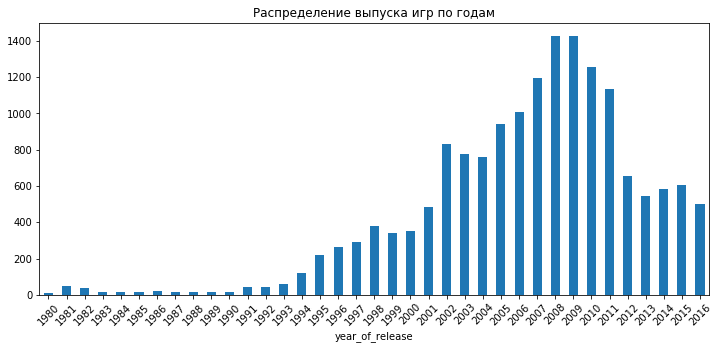

In [21]:
# построение столбчатой диаграммы
(data.groupby('year_of_release')['name'].count()
 .plot(kind = 'bar', rot = 45, figsize = (12,5)))
plt.title('Распределение выпуска игр по годам')
plt.show()

Судя по графику больше всего игр выпускалось в 2008 и 2009 годах. С 2010 же года наблюдался спад.

В связи с тем, что прогнозирование необходимо провести на 2017 год, данные за 80-е и начало 90-х в рассчет брать не будем. К тому же, судя по графику, продаж в то время было достаточно мало. 
 

In [22]:
data= data.query('year_of_release > 1994')

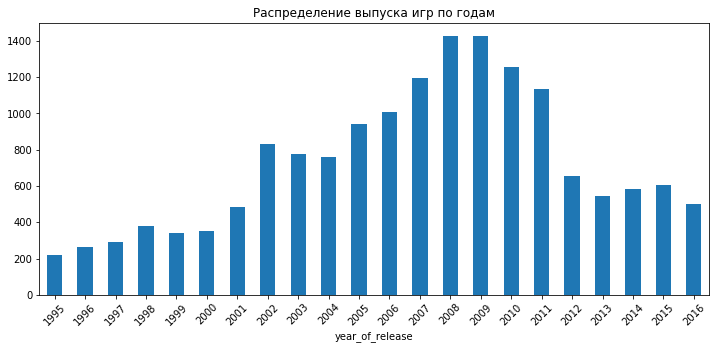

In [23]:
(data.groupby('year_of_release')['name'].count()
 .plot(kind = 'bar', rot = 45, figsize = (12,5)))
plt.title('Распределение выпуска игр по годам')
plt.show()

### Анализ продаж

Выберем платформы с наибольшими суммарными продажами и построим график распределения по годам.


In [24]:
# топ 10 платформ с наибольшими продажами
top_10 = (data.groupby('platform').agg({'total_sales': 'sum'})
          .sort_values(by = 'total_sales',ascending = False)
          .head(10))

In [25]:
top_10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


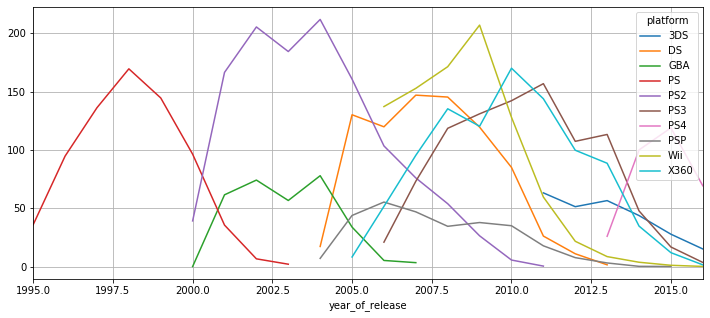

In [26]:
# график распределения продаж для платформ из топ 10 по годам
(data.query('platform in @top_10.index')
 .pivot_table(index = 'year_of_release',columns = 'platform',values = 'total_sales',aggfunc = 'sum')
 .plot(figsize = (12,5), grid = True)
)
plt.show()

Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [27]:
# определение срока существования платформ
life_cycle = data.groupby('platform').agg({'year_of_release' : ['min', 'max']}).reset_index()
life_cycle.columns = ['platform',"min_year", "max_year"]
life_cycle['duration'] = life_cycle["max_year"] - life_cycle['min_year']

In [28]:
# обзор значений столбца duration
life_cycle['duration'].describe()

count    26.000000
mean      6.346154
std       4.664267
min       0.000000
25%       3.250000
50%       6.000000
75%       9.750000
max      21.000000
Name: duration, dtype: float64

In [29]:
# обзор 10 компаний которые продержались на рынке дольше остальных
life_cycle.sort_values(by = 'duration',ascending=False).head(10)

,platform,min_year,max_year,duration
9,PC,1995,2016,21
15,PSP,2004,2015,11
12,PS2,2000,2011,11
23,X360,2005,2016,11
21,Wii,2006,2016,10
13,PS3,2006,2016,10
2,DC,1998,2008,10
3,DS,2004,2013,9
24,XB,2000,2008,8
11,PS,1995,2003,8


Вывод:

- В топ 10 платформ с нибольшим количеством продаж вошли такие фирмы как : PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. 
- PS2 была явным лидером на рынке, просуществовала она 11 лет- до 2011 года.
- Максимально долго держались на рынке две платформы - PC(31 год и это не предел) и DS (существовала 28 лет до 2013 года).
- Судя по расчетам, в среднем платформы существуют 6-7 лет.


Для того, чтобы определить на каких платформах все еще имеет смысл выпускать новую игру определим **актуальный период**. Он же равен примерно половине среднего времени жизни платформы, тк половину периода платформа падает в продажах. Согласно предыдему пункту, среднее существование платформ - 6-7 лет - поэтому за актуальный период примем период примерно в 3 года.

### Анализ продаж за актуальный период.

В предыдущем пункте был определен актуальный период - около 3 лет. В связи с тем, что нам предоставлены данные до 2016 года, в новой таблице actual_data запишем всю информацию об играх с 2013 года. Данные за предыдущие периоды учитывать не будем.

In [30]:
# заносим таблицу actual_data данные за с начала 2013 года 
actual_data= data.query('year_of_release >= 2012')

In [31]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [32]:
(actual_data.groupby('platform')
 .agg({'total_sales': 'sum'})
 .sort_values(by = 'total_sales',ascending=False)
 .head(5))

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


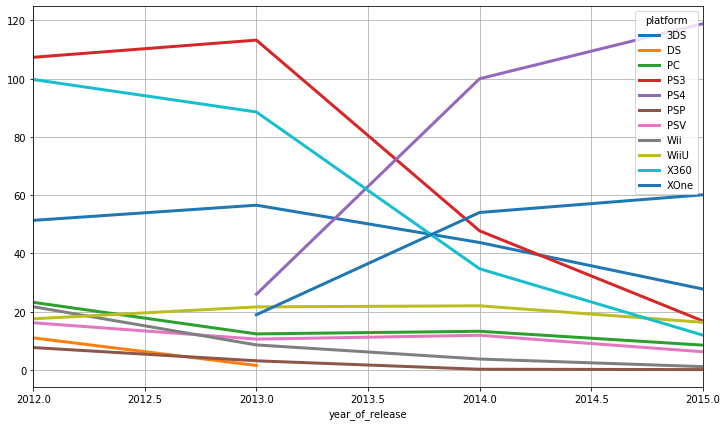

In [33]:
# график распределения продаж для платформ из топ 10 по годам
(actual_data
 .pivot_table(index = 'year_of_release',columns = 'platform',values = 'total_sales',aggfunc = 'sum')
 .plot(figsize = (12,7), grid = True, linewidth = 3, xlim = (2012,2015))
)
plt.show()

Информация о годовых продажах предварительно поступает в начале февраля следующего года, т.е. не ранее 02/2017, поэтому за 2016 год нам предоставлены не полные данные.

В связи с этим данные за 2016 год рассмаривать на графике не будем.

По продажам в актульный период лидируют платформы : PS4(явный лидер), XOne, 3DS - будем считать их за потенциально прибыльных.

In [34]:
import warnings
warnings.filterwarnings('ignore')

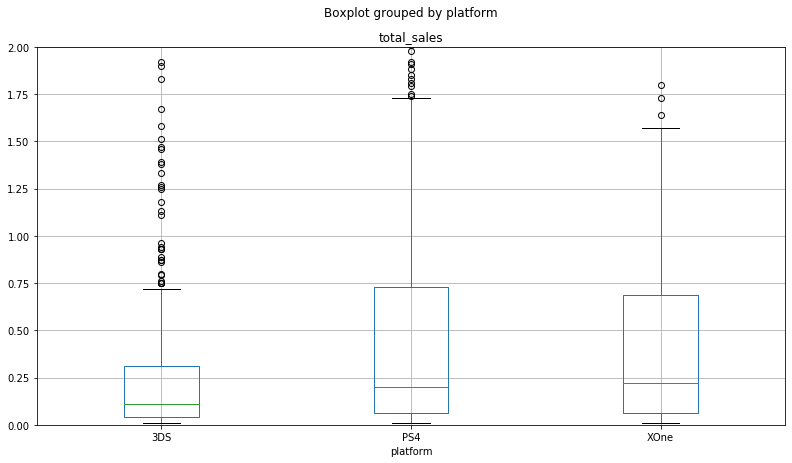

In [35]:
(actual_data[actual_data['platform']
             .isin(['PS4','XOne','3DS'])]
             .boxplot(column = 'total_sales',by = 'platform',figsize = (13,7)
                    )
)
plt.ylim(0,2)
plt.show()

Вышепредставленные графики показывают распределение продаж отдельных игр. Получается, что на двух платформах (PS4, XOne) отдельные игры продаются в среднем одинаково. В 3DS же продажи отдельных игр показывают самые низкие результаты.

### Влияние отзывов пользователей и критиков

Посмотрим как влияют отзывы пользователей и критиков на продажи внутри трех популярных платформ - PS4, 3DS, XOne.  Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами. 


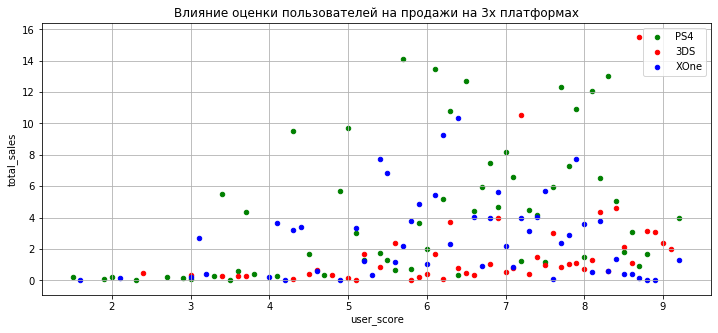

In [36]:
# построение диаграммы рассеяния 
ax= (actual_data.query('platform == "PS4"')
            .pivot_table(index='user_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'user_score',y = 'total_sales',
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'green',
                 label ="PS4"))
(actual_data.query('platform == "3DS"')
            .pivot_table(index='user_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'user_score',y = 'total_sales',
               ax=ax,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'red',
               label = "3DS"))
(actual_data.query('platform == "XOne"')
            .pivot_table(index='user_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'user_score',y = 'total_sales',
               ax=ax,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'blue',
               label = "XOne"))

plt.title('Влияние оценки пользователей на продажи на 3х платформах')
plt.show()

In [37]:
# подсчет корреляции для PS4
actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['total_sales'])

-0.031957110204556424

In [38]:
# подсчет корреляции для XOne
actual_data.query('platform == "XOne"')['user_score'].corr(actual_data.query('platform == "XOne"')['total_sales'])

-0.06892505328279414

In [39]:
# подсчет корреляции для 3DS
actual_data.query('platform == "3DS"')['user_score'].corr(actual_data.query('platform == "3DS"')['total_sales'])

0.19758263411038599

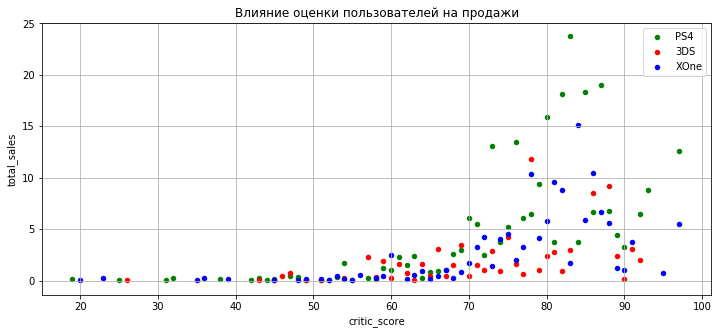

In [40]:
# построение диаграммы рассеяния 
ax= (actual_data.query('platform == "PS4"')
            .pivot_table(index='critic_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'critic_score',y = 'total_sales',
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'green',
                 label ="PS4"))
(actual_data.query('platform == "3DS"')
            .pivot_table(index='critic_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'critic_score',y = 'total_sales',
               ax=ax,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'red',
               label = "3DS"))
(actual_data.query('platform == "XOne"')
            .pivot_table(index='critic_score',values='total_sales',aggfunc='sum').reset_index()
            .plot(x = 'critic_score',y = 'total_sales',
               ax=ax,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'blue',
               label = "XOne"))

plt.title('Влияние оценки пользователей на продажи')
plt.show()

In [41]:
# подсчет корреляции для PS4
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['total_sales'])

0.40656790206178095

In [42]:
# подсчет корреляции для XOne
actual_data.query('platform == "XOne"')['critic_score'].corr(actual_data.query('platform == "XOne"')['total_sales'])

0.4169983280084017

In [43]:
# подсчет корреляции для 3DS
actual_data.query('platform == "3DS"')['critic_score'].corr(actual_data.query('platform == "3DS"')['total_sales'])

0.3208028695360785

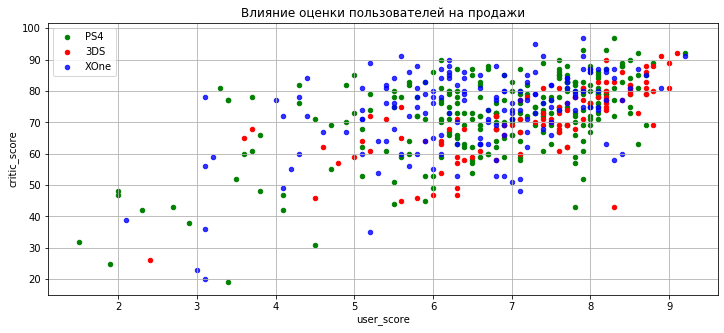

In [44]:
# построение диаграммы рассеяния 
ax= (actual_data.query('platform == "PS4"')
            .plot(x = 'user_score',y = 'critic_score',
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'green',
                 label ="PS4"))
(actual_data.query('platform == "3DS"')
            .plot(x = 'user_score',y = 'critic_score',
               ax=ax,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'red',
               label = "3DS"))
(actual_data.query('platform == "XOne"')
            .plot(x = 'user_score',y = 'critic_score',
               ax=ax,
               alpha=0.8,
               kind = 'scatter',
               figsize = (12,5),
               grid = True,
               color = 'blue',
               label = "XOne"))

plt.title('Влияние оценки пользователей на продажи')
plt.show()

In [45]:
# подсчет корреляции для PS4
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['user_score'])

0.5576539782764632

In [46]:
# подсчет корреляции для XOne
actual_data.query('platform == "XOne"')['critic_score'].corr(actual_data.query('platform == "XOne"')['user_score'])

0.4724621124165801

In [47]:
# подсчет корреляции для 3DS
actual_data.query('platform == "3DS"')['critic_score'].corr(actual_data.query('platform == "3DS"')['user_score'])

0.7227622474404906

Итак, мы посмотрели как влияют на продажи внутри самой популярной платформы - PS4 -  отзывы пользователей и критиков:
- Взаимосвязь между оценкой пользователей и продажами оказалась очень слабой. Судя по диаграмме рассчеяния также можно понять, что сумммарные продажи слабо зависят от оценок клиентов. Eсли оценка пользователей оказалась меньше 3х - сумма продаж держится на околонулевых отметках.
- Оценка критиков, в свою очередь, оказывает большее влияние на продажи. Взаимосвязь между этими факторами оказалась умеренной - чем выше оценка критиков- тем больше продаж. Продажи начинают расти, если оценка оказывается выше 70.
- Зависимость между оценками пользователей и оценками критиков оказалась заметной, что говорит о том, что часто их мнения и оценки схожи.

Сравним результаты с другими полулярными платформами - 3DS, XOne:

- Взаимосвязь между оценкой пользователей и продажами на платформах XOne и 3DS оказались также слабыми. На всех платформах, где оценка пользователей оказалась меньше 3х - сумма продаж держится на околонулевых отметках.

- Взаимосвязь между оценкой пользователей и продажами оказалась также умеренной (корреляция на всех платформах - около 0.4) - чем выше оценка критиков- тем больше продаж. Продажи начинают расти, если оценка оказывается выше 60.

- Зависимость между оценками пользователей и оценками критиков оказалась самой заметной на 3DS.


### Распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам. Также определим жанры с высокими и низкими продажами за актуальный период.

In [48]:
# группировка по количеству и продажам каждого жанра
genre_data = actual_data.groupby('genre').agg({'name':'count','total_sales': 'sum'}).sort_values(by = 'total_sales',ascending=False)

In [49]:
genre_data

,name,total_sales
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,268,181.07
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


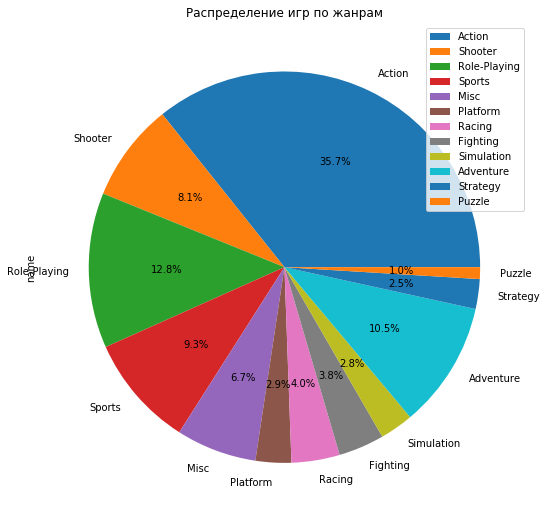

In [50]:
# построение круговой диаграммы 
genre_data.plot(y='name',kind= 'pie',figsize = (9,9),autopct='%1.1f%%')
plt.title('Распределение игр по жанрам')
plt.show()

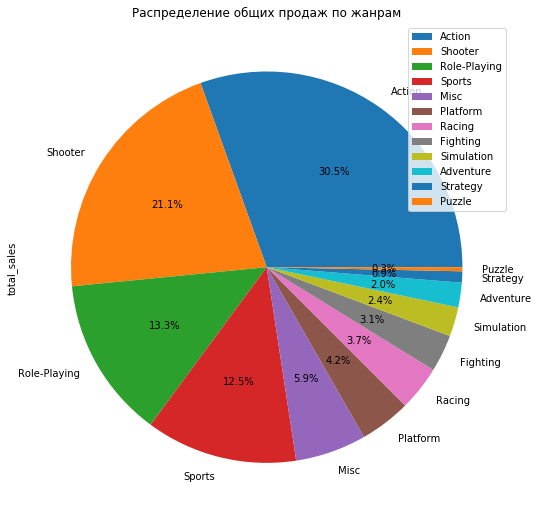

In [51]:
# построение круговой диаграммы 
genre_data.plot(y='total_sales',kind= 'pie',figsize = (9,9),autopct='%1.1f%%')
plt.title('Распределение общих продаж по жанрам')
plt.show()

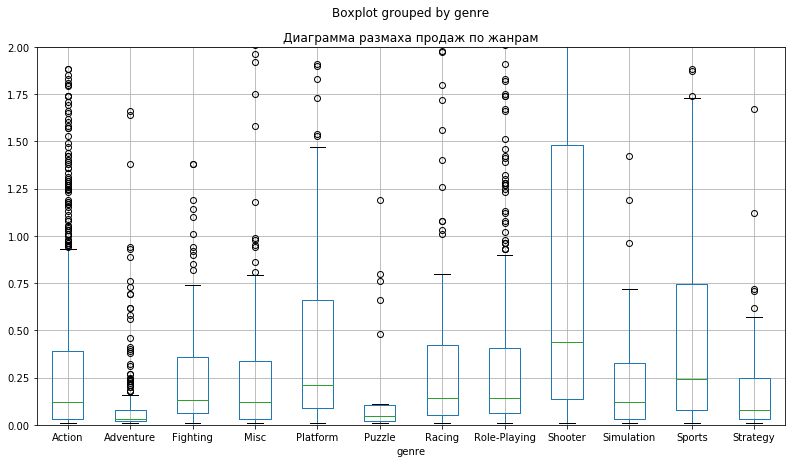

In [52]:
# построение диаграммы размаха продаж по жанрам
actual_data.boxplot(column = 'total_sales',by = 'genre',figsize = (13,7))
plt.title('Диаграмма размаха продаж по жанрам')
plt.ylim(0,2)
plt.show()

Вывод:
   - Больше всего производят игр в жанре Action (около 36% всего рынка). Далее идут такие жанры как Role-Playing(12.8%) и Adventure(10.5%).
   - Больше всего продаж оказалось также в самом распространенном жанре Action, однако медианные продажи в данном жанре оказались на среднем уровне.
   - Игры в жанре Shooter, которые по количеству занимают всего 8% рынка и 21% от всех продаж, явно  лидируют по медианным продажам.
   - Игры в жанре Sports также занимают хорошие позиции по медианным продажам и составляют 12% от все продаж.

## Составление портрета пользователя каждого региона

Определим самые популярные платформы и жанры игр в Северной Америке (NA), Японии (JP) и Европе(EU) за актуальный период.
Посмотрим влияет ли рейтинг ESRB на продажи в каждом отдельном регионе.

In [53]:
# обзор прибыли разных платформ за каждый год
(actual_data
 .pivot_table(index = 'year_of_release',columns = 'platform',values = 'total_sales',aggfunc = 'sum'))

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [54]:
actual_data_1 = actual_data.query('platform not in ("DS","PSP", "X360","Wii","PS3")')

### Северная Америка. 



In [55]:
# топ 5 платформ по продажам 
top_platform_na = actual_data_1.groupby('platform').agg({'na_sales':'sum'})

top_platform_na['%_of_total']= ((top_platform_na.na_sales / top_platform_na.na_sales.sum())*100).round(1)
top_platform_na = top_platform_na.sort_values(by= 'na_sales', ascending=False).head()

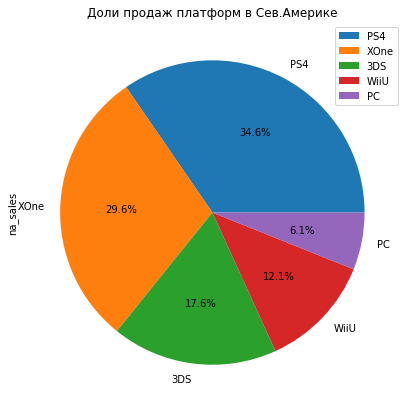

In [56]:
# диаграмма распределения платформ по продажам 
top_platform_na.plot(y= 'na_sales', kind='pie',figsize = (7,7),autopct='%1.1f%%')
plt.title('Доли продаж платформ в Сев.Америке')
plt.show()

In [57]:
# топ 5 жанров по продажам
top_genre_na = actual_data_1.groupby('genre').agg({'na_sales':'sum'})
top_genre_na['%_of_total'] = ((top_genre_na.na_sales / top_genre_na.na_sales.sum())*100).round(1)
top_genre_na=top_genre_na.sort_values(by = 'na_sales', ascending=False).head()

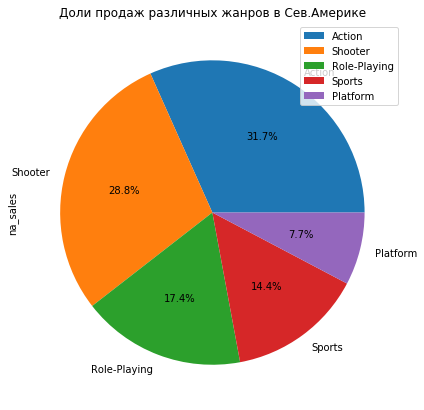

In [58]:
# распределение жанров по продажам
top_genre_na.plot(y = 'na_sales', kind = 'pie',figsize = (7,7),autopct = '%1.1f%%')
plt.title('Доли продаж различных жанров в Сев.Америке')
plt.show()

In [59]:
# продажи в зависимости от рейтинга 
rating_na = actual_data.groupby('rating').agg({'na_sales':'sum'})
rating_na['%_of_total']= ((rating_na.na_sales / rating_na.na_sales.sum())*100).round(1)
rating_na.sort_values(by= 'na_sales', ascending = False)

,na_sales,%_of_total
rating,,
M,231.57,39.2
E,114.37,19.4
undefined,103.31,17.5
E10+,75.70,12.8
T,66.02,11.2


- Лидером по продажам среди платформ в Северной Америке оказалась X360 - на нее приходится 23.7% всех продаж.
Далее по популярности идут такие платформы как - PS4(18.4%), PS3(17.5%), XOne(15.8%), 3DS(9.4%)
- Самыми популярными жанрами оказались - Action (30% рынка), Shooter(24.5%),Sports, Role-Playing и Misc.
- Около 40% продаж приходится на игры с рейтингом "М"(«Для взрослых») и меньше всего - с рейтингом Т (11.2%).

### Европа

In [60]:
# топ 5 платформ по продажам 
top_eu = actual_data_1.groupby('platform').agg({'eu_sales':'sum'})
top_eu['%_of_total'] = ((top_eu.eu_sales / top_eu.eu_sales.sum())*100).round(1)
top_eu.sort_values(by = 'eu_sales', ascending=False).head()

,eu_sales,%_of_total
platform,,
PS4,141.09,45.6
XOne,51.59,16.7
3DS,42.64,13.8
PC,37.76,12.2
WiiU,25.13,8.1


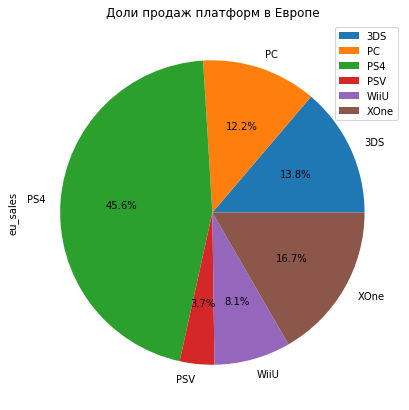

In [61]:
# диаграмма распределения платформ по продажам 
top_eu.plot(y= 'eu_sales', kind = 'pie',figsize = (7,7),autopct='%1.1f%%')
plt.title('Доли продаж платформ в Европе')
plt.show()

In [62]:
# топ 5 жанров по продажам
top_genre_eu = actual_data_1.groupby('genre').agg({'eu_sales':'sum'})
top_genre_eu['%_of_total']= ((top_genre_eu.eu_sales / top_genre_eu.eu_sales.sum())*100).round(1)
top_genre_eu = top_genre_eu.sort_values(by= 'eu_sales', ascending=False).head()

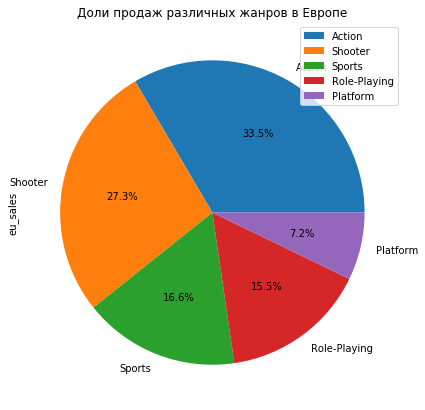

In [63]:
#  распределение жанров по продажам
top_genre_eu.plot(y= 'eu_sales', kind='pie',figsize = (7,7),autopct='%1.1f%%')
plt.title('Доли продаж различных жанров в Европе')
plt.show()

In [64]:
# продажи в зависимости от рейтинга 
rating_eu = actual_data_1.groupby('rating').agg({'eu_sales':'sum'})
rating_eu['%_of_total']= ((rating_eu.eu_sales / rating_eu.eu_sales.sum())*100).round(1)
rating_eu.sort_values(by= 'eu_sales', ascending=False)

,eu_sales,%_of_total
rating,,
M,103.98,33.6
E,69.92,22.6
undefined,68.71,22.2
T,36.35,11.7
E10+,30.61,9.9


- Лидером продаж среди платформ в Европе оказалась PS4 - на нее приходится 27.8 % всех продаж.
Далее по популярности идут такие платформы как - PS3(21.1%), X360 (14.7%), XOne(10.2%), 3DS(8.4%)
- Самыми популярными жанрами оказались - Action (31% рынка), Shooter(22.4%),Sports(13.6%), Role-Playing и Racing.
- Около 40% продаж также приходится на игры с рейтингом "М"(«Для взрослых») и меньше всего - с рейтингом Т (10.4%).

### Япония

In [65]:
# топ 5 платформ по продажам 
top_jp = actual_data_1.groupby('platform').agg({'jp_sales':'sum'})
top_jp['%_of_total']= ((top_jp.jp_sales / top_jp.jp_sales.sum())*100).round(1)
top_jp = top_jp.sort_values(by= 'jp_sales', ascending=False).head()

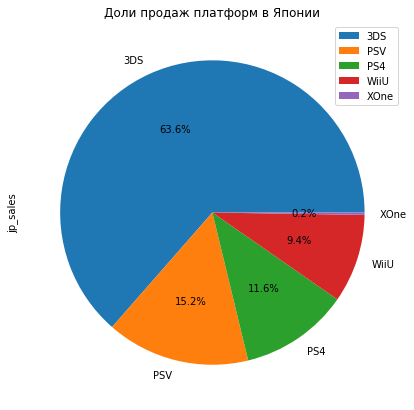

In [66]:
# диагрмма распределения платформ по продажам 
top_jp.plot(y= 'jp_sales', kind='pie',figsize = (7,7),autopct='%1.1f%%')
plt.title('Доли продаж платформ в Японии')
plt.show()

In [67]:
# топ 5 жанров по продажам
top_genre_jp = actual_data_1.groupby('genre').agg({'jp_sales':'sum'})
top_genre_jp['%_of_total']= ((top_genre_jp.jp_sales / top_genre_jp.jp_sales.sum())*100).round(1)
top_genre_jp = top_genre_jp.sort_values(by= 'jp_sales', ascending=False).head()

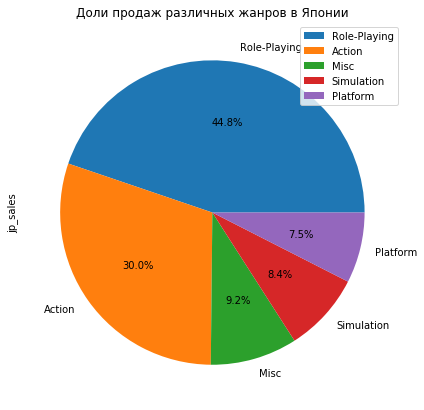

In [68]:
#  распределение жанров по продажам
top_genre_jp.plot(y= 'jp_sales', kind='pie',figsize = (7,7),autopct='%1.1f%%')
plt.title('Доли продаж различных жанров в Японии')
plt.show()

In [69]:
# продажи в зависимости от рейтинга 
rating_jp = actual_data_1.groupby('rating').agg({'jp_sales':'sum'})
rating_jp['%_of_total']= ((rating_jp.jp_sales / rating_jp.jp_sales.sum())*100).round(1)
rating_jp.sort_values(by= 'jp_sales', ascending=False)

,jp_sales,%_of_total
rating,,
undefined,82.00,59.4
E,23.99,17.4
T,15.37,11.1
M,9.15,6.6
E10+,7.63,5.5


- Явным лидером продаж среди платформ в Японии оказалась 3DS - на нее приходится 45.6 % всех продаж.
Далее по популярности идут такие платформы как - PS3(18.3%), PSV (11 %), PS4(8%), 3DS(7%)
- Самыми популярными жанрами оказались - Role-Playing (34% рынка), Action(27.4%),Misc(6.7%), Simulation и Fighting.
- Около 57% всех продаж приходятся на игры с неприсвоенным рейтингом, что показывает, что жители Японии не ориентируются на ESRB рейтинг при покупке игр.

Вывод:

 В целом, жители Северной Америки и Европы схожи в своих предпочтениях в играх. Топ 5 самых популярных платформ идентичен друг другу - в них вошли такие платформы как Х360, PS4, PS3, XOne, 3DS. Самым популярным жанром в обоих регионах стали жанры  Action и Shooter. Также можно сделать вывод, что жители данных регионов при покупке ориентируются на рейтинг - больше всего продаж приходятся на рейтинги М («Для взрослых») и Е(«Для всех»).
    
 В Японии же ситуация отличается. Около половины всех продаж приходится на платформу 3DS, а самым популяным жанром оказался Role-Playing. 57% всех продаж приходятся на игры с неприсвоенным рейтингом, так как рейтинг ESRB не требуется получать, чтобы продавать в Японии игру аниме.

## Проверка гипотез.

### Проверка первой гипотезы.

Примем за нулевую гипотезу условие Н0 : средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
за альтернативную Н1: средние пользовательские рейтинги платформы Xbox One **не равны** средним пользовательским рейтингам PC  (гипотеза является двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны)


In [70]:
# обзор средних пользовательских рейтингов платформы PC
actual_data.query('platform == "PC"')['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [71]:
# обзор средних пользовательских рейтингов платформы XOne
actual_data.query('platform == "XOne"')['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Судя по вышепредсталенным данным, средние пользовательские рейтинги платформ Xbox One и PC значительно не отличаются между собой.

С помощью двустороннего теста проверим можно ли в этой ситуции ориентироваться на средние показатели и принять нулевую гипотезу.

За alpha - критический уровень статистической значимости примем значение 0.05.

In [72]:
# проведение двустороннего теста

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

first_result = st.ttest_ind( # берем данные без пропусков 
        actual_data.query('platform == "PC" and not user_score.isna()', engine = 'python')['user_score'],
        actual_data.query('platform == "XOne" and not user_score.isna()', engine = 'python')['user_score'],
        equal_var=False) # значение False, так как выборки разного размера

print('p-значение:', first_result.pvalue)

if first_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC статистически не значимо отличаются друг от друга, и с вероятностью в почти 55 % такое или большее различие можно получить случайно.

Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами платформ. То есть данные не противоречат нулевой гипотезе, поэтому мы её не отвергаем.

In [73]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Проверка второй гипотезы.

Примем за нулевую гипотезу условие Н0 : средние пользовательские рейтинги жанров Action и Sports равны; за альтернативную Н1: средние пользовательские рейтинги жанров Action и Sports не равны(гипотеза является двусторонней) За alpha - критический уровень статистической значимости примем значение 0.05

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.

Из массивов, которые передадим в стат-тест исключим пропуски.

In [74]:
# обзор средних пользовательских рейтингов жанра Action
actual_data.query('genre == "Action"')['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [75]:
# обзор средних пользовательских рейтингов жанра Sports
actual_data.query('genre == "Sports"')['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Судя по вышепредставленным данным, средние пользовательские рейтинги жанра Action выше чем у жанра Sports. 

С помощью двустороннего теста проверим можно ли в этой ситуции ориентироваться на средние показатели и не является ли наблюдаемая разница шумом или случайностью.

In [76]:
# проведение двустороннего теста

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

second_result = st.ttest_ind( # берем данные без пропусков 
        actual_data.query('genre == "Action" and not user_score.isna()', engine = 'python')['user_score'],
        actual_data.query('genre == "Sports" and not user_score.isna()', engine = 'python')['user_score'],
        equal_var=False) # значение False, так как выборки разного размера

print('p-значение:', second_result.pvalue)

if second_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что такое или большее различие между средними показателями с вероятностью менее 5% можно получить случайным образом. 
Полученная вероятность слишком мала, чтобы делать вывод о равенстве рейтингов жанра Action и Sports, и является основанием отвергнуть нулевую гипотезу.

## Вывод.



Целью исследования было выявить закономерности, определяющие успешность игры,что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании 

Для достижения целей исследования, сначала мы определили **актуальный период**. Он же равен примерно половине среднего времени жизни платформы, тк половину периода платформа падает в продажах. Среднее существование платформ - 6-7 лет - поэтому за актуальный период был принят промежуток с 2013 по 2016 год.

Было выявлено, что все платформы идут на убыль по продажам к 2016 году.
По продажам в актульный период лидируют платформы : PS4(явный лидер), XOne и 3DS - считаем их за потенциально прибыльных так как к 2016 году уровень их продаж упал не так сильно. 

Результаты по медианным продажам ниже всего у 3DS , однако эта платформа стала лидером продаж в Японии (почти половина продаж приходится на 3DS).

Взаимосвязь между оценкой пользователей и продажами на платформах оказалась слабой. Оценка критиков, в свою очередь, оказывает большее влияние на продажи. Взаимосвязь между этими факторами оказалась умеренной. На это стоит обратить внимание при продвижении новых игр.

Больше всего продаж оказалось в самом распространенном жанре Action (около 36% всего рынка),однако медианные продажи в данном жанре оказались на среднем уровне. 

Игры в жанре Shooter и Sports занимают лидирующие позиции по медианным продажам, однако занимают небольшую часть рынка предложения игр. Возможно, создателям игр стоит обратить внимание на это и рассмотреть выпуск игр в этих жанрах на мировом рынке.

Если ориентироваться на отдельные регионы, то в можно сказать,что жители Северной Америки и Европы схожи в своих предпочтениях в играх. Топ 5 самых популярных платформ идентичен друг другу - в них вошли такие платформы как Х360, PS4, PS3, XOne, 3DS. Самым популярным жанром в обоих регионах стали жанры  Action и Shooter. Также можно сделать вывод, что жители данных регионов при покупке ориентируются на рейтинг - больше всего продаж приходятся на рейтинги М («Для взрослых») и Е(«Для всех»). 

В Японии же, самыми популяными жанрами оказались Role-Playing и Action. 57% всех продаж приходятся на игры с неприсвоенным рейтингом, поэтому можно предположить, что жители Японии не ориентируются на ESRB рейтинг при покупке игр.
